# **Libraries**

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

# **Penjelasan Kolom Dataset**

---



**Pregnancies**: Untuk menyatakan jumlah kehamilan

**Glucose (mg/dL)**: Untuk menyatakan kadar glukosa dalam darah

**BloodPressure (mmHg)**: Untuk menyatakan pengukuran tekanan darah

**SkinThickness (mm)**: Untuk menyatakan ketebalan kulit

**Insulin (µIU/mL)**: Untuk menyatakan kadar insulin dalam darah

**BMI**: Untuk menyatakan indeks massa tubuh

**DiabetesPedigreeFunction**: Untuk menyatakan persentase faktor internal diabetes 

**Age**: Untuk menyatakan usia

**Outcome**: Untuk menyatakan hasil akhir, 1 adalah Ya dan 0 adalah Tidak

# **Data Understanding**

In [77]:
df=pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [79]:
df.shape

(768, 9)

In [80]:
df.duplicated().sum()

0

In [81]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [82]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# **Data Cleaning**

In [83]:
df = df.rename(columns={
    'Pregnancies': 'kehamilan',
    'Glucose': 'glukosa',
    'SkinThickness': 'TebalKulit',
    'DiabetesPedigreeFunction': 'PersenDiabet',
    'Age': 'usia',
    'Outcome': 'hasil'
})
df.head()

,kehamilan,glukosa,BloodPressure,TebalKulit,Insulin,BMI,PersenDiabet,usia,hasil
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **Exploratory Data Analysis**

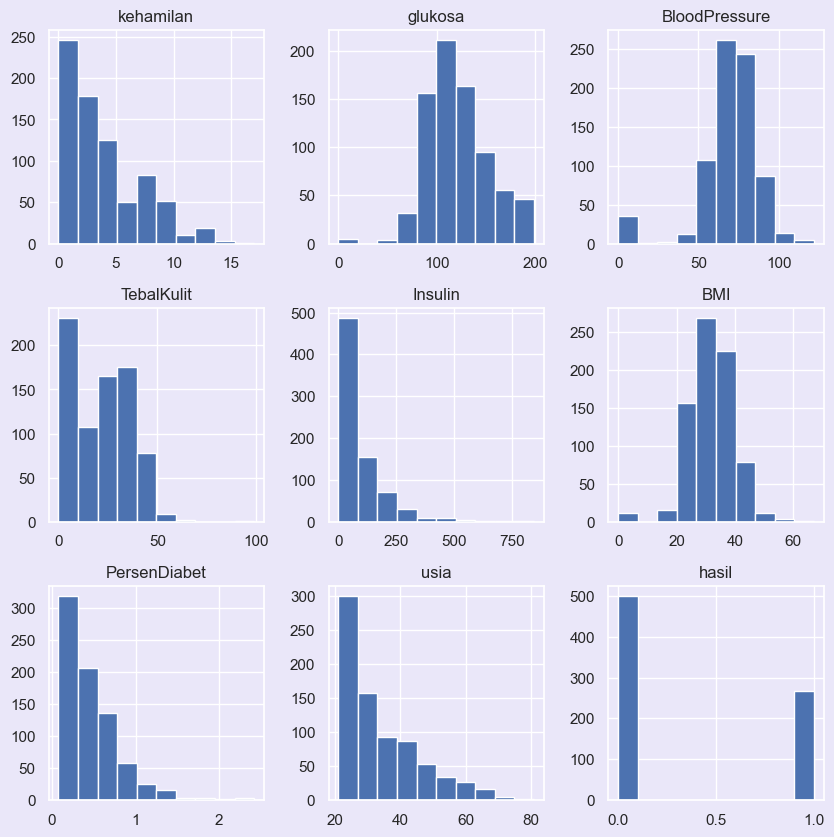

In [84]:
df.hist(figsize = (10,10))
plt.show()

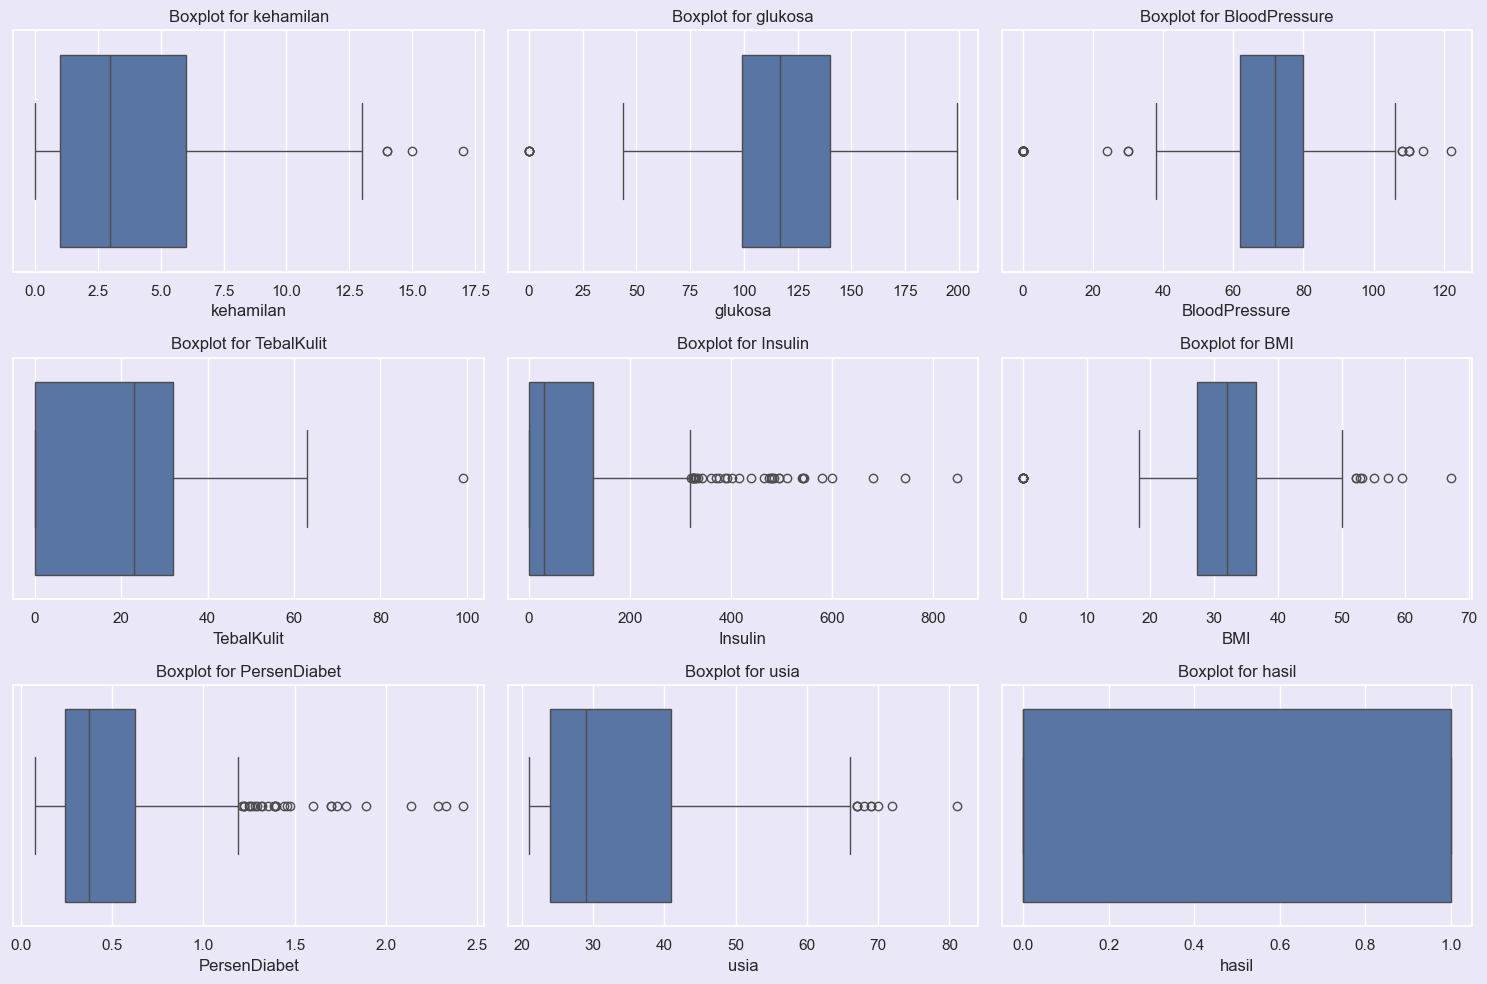

In [85]:
num_rows, num_cols = 3, 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

axes = axes.flatten()

for i, column in enumerate(df.columns):
    sns.boxplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f'Boxplot for {column}')

for j in range(len(df.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

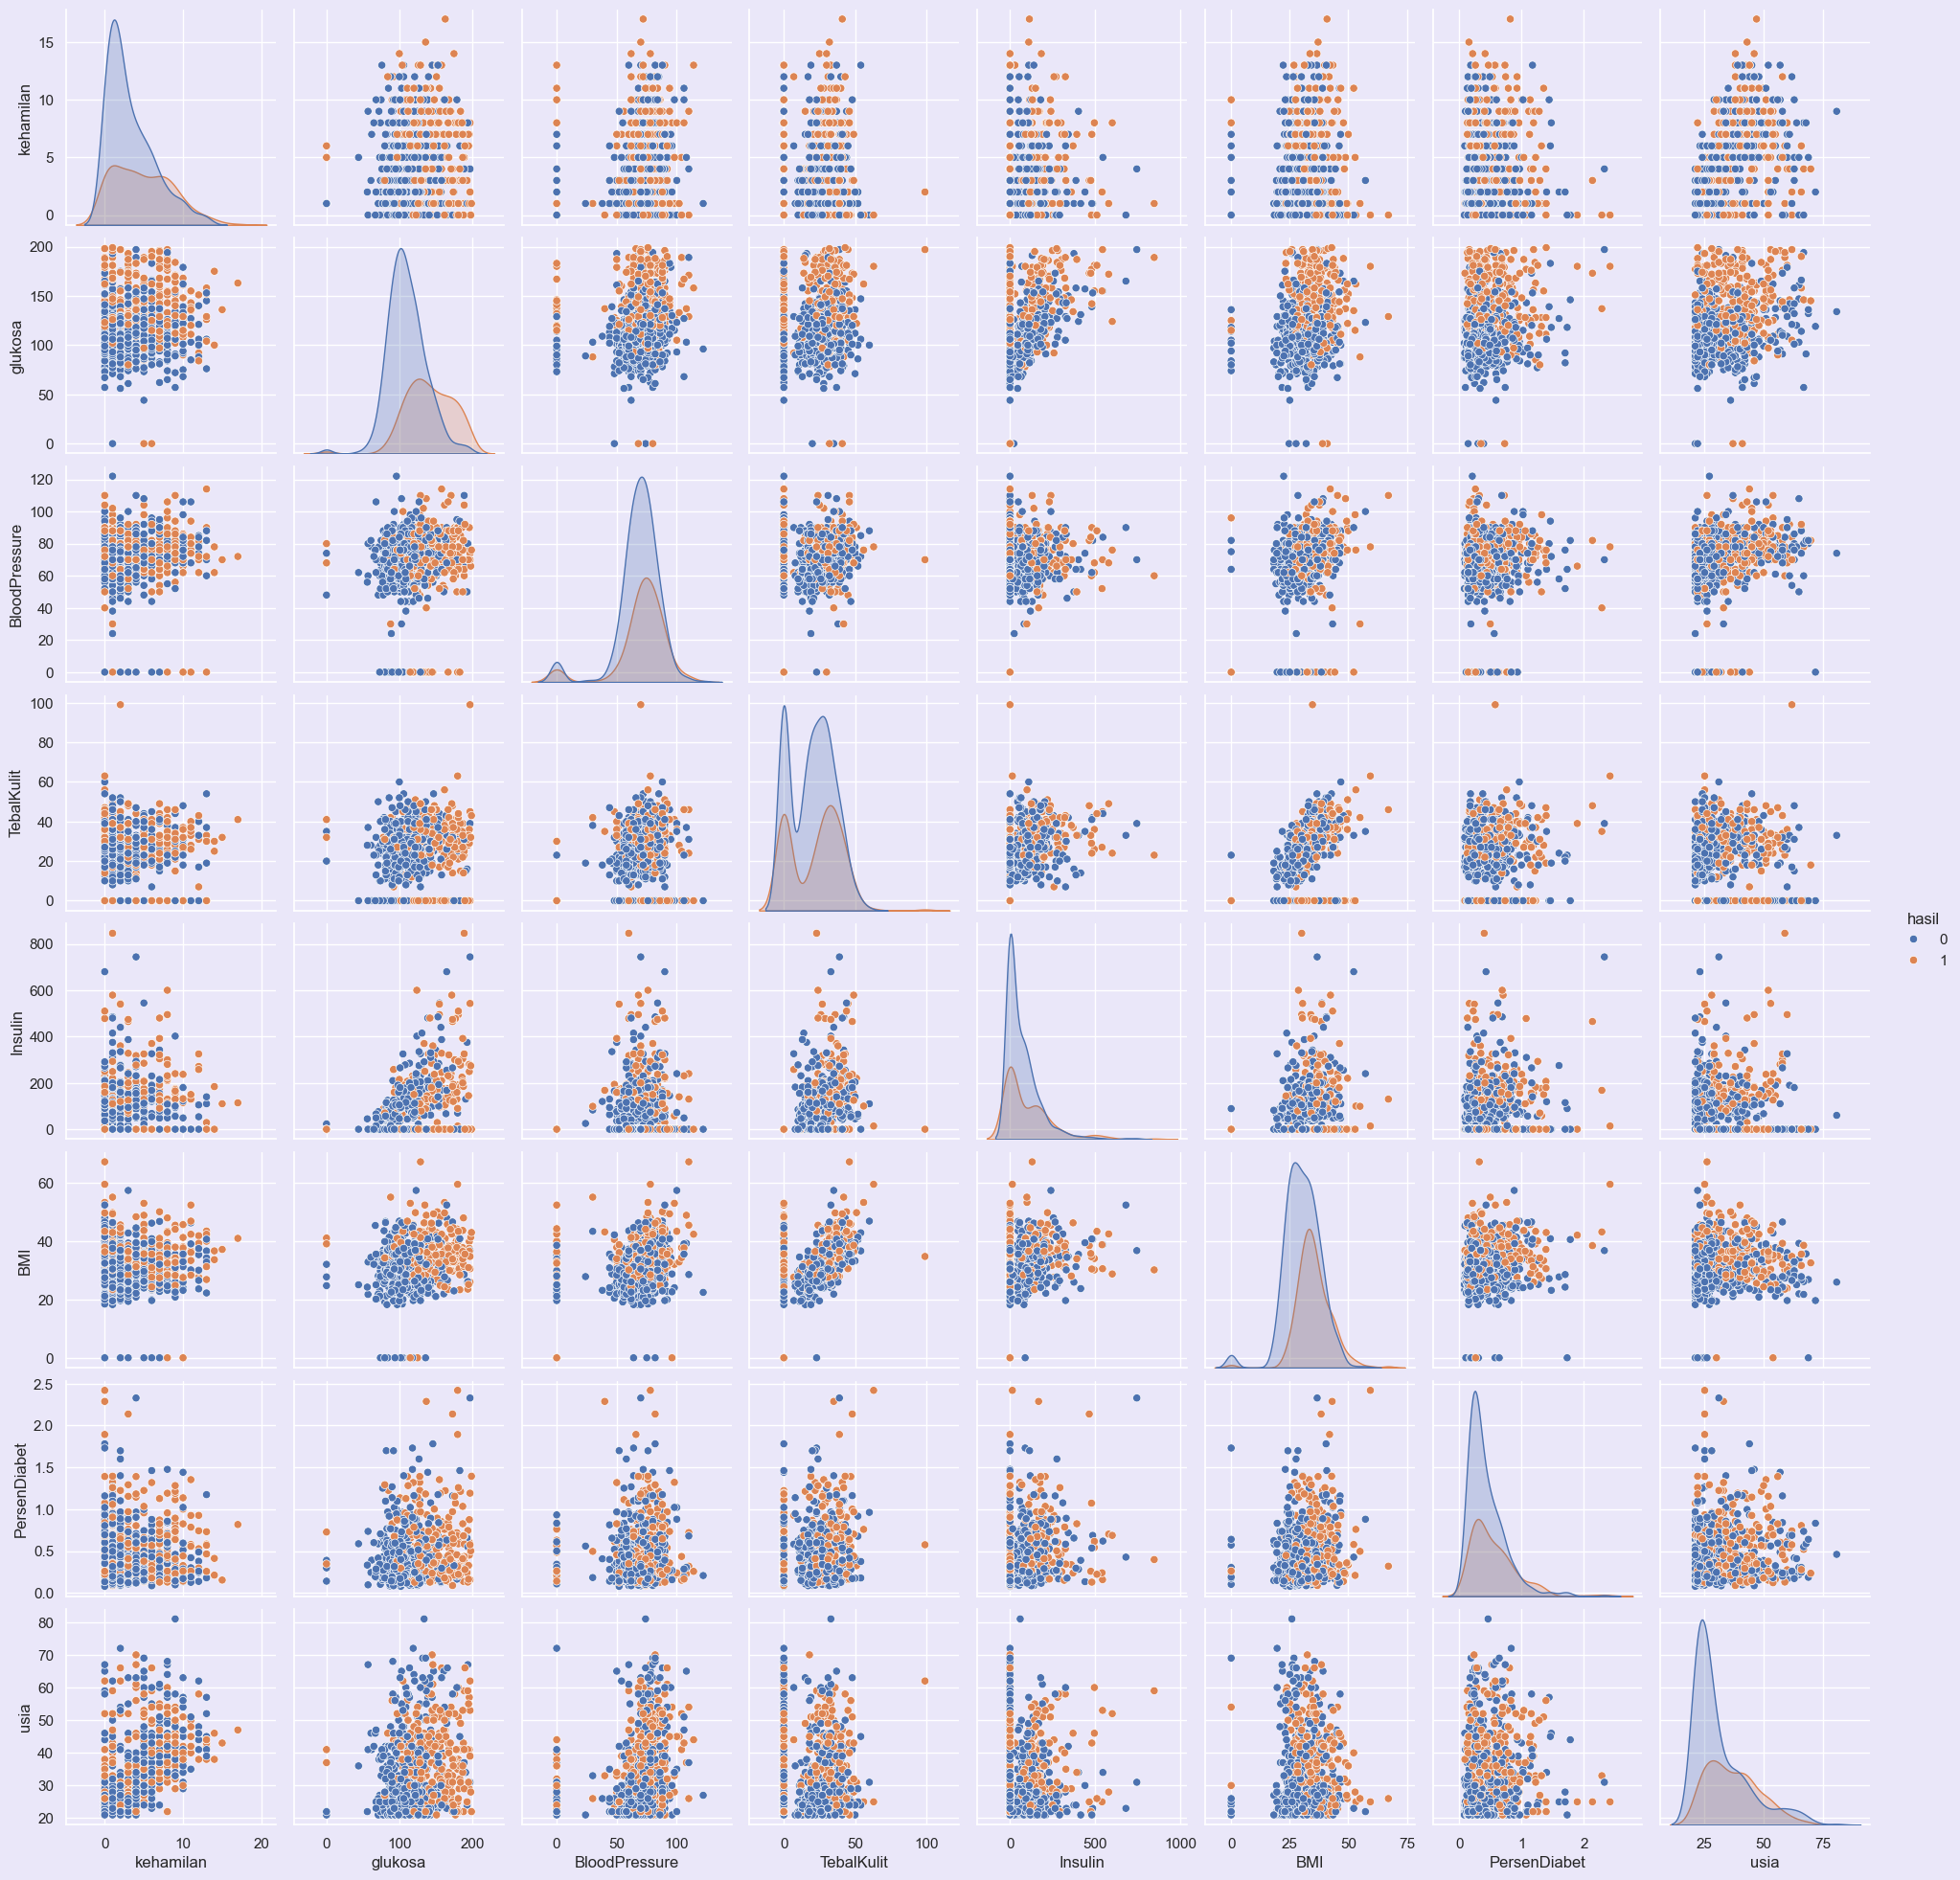

In [86]:
sns.pairplot(data = df, hue = 'hasil' )
plt.show()

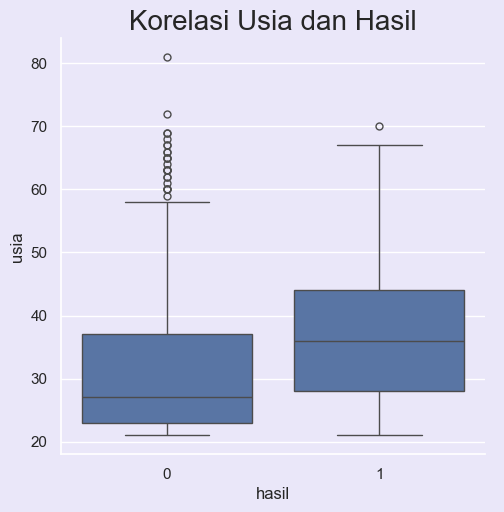

In [87]:
sns.set(rc={"axes.facecolor":"#EAE7F9","figure.facecolor":"#EAE7F9"})
p=sns.catplot(x="hasil",y="usia", data=df, kind='box')
plt.title("Korelasi Usia dan Hasil", size=20, y=1.0);

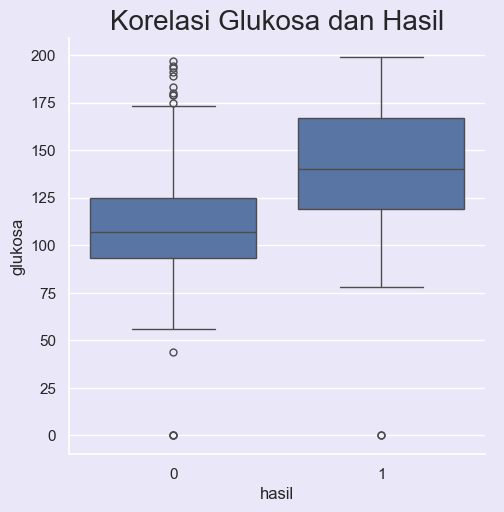

In [88]:
sns.set(rc={"axes.facecolor":"#EAE7F9","figure.facecolor":"#EAE7F9"})
p=sns.catplot(x="hasil",y="glukosa", data=df, kind='box')
plt.title("Korelasi Glukosa dan Hasil", size=20, y=1.0);

In [89]:
hig_corr = df.corr()
hig_corr_features = hig_corr.index[abs(hig_corr["hasil"]) >= 0.2]
hig_corr_features

Index(['kehamilan', 'glukosa', 'BMI', 'usia', 'hasil'], dtype='object')

# **Data Pre-Processing**

In [90]:
numeric_columns = ['Insulin', 'PersenDiabet',]

for column_name in numeric_columns:
    Q1 = np.percentile(df[column_name], 25, interpolation='midpoint')
    Q3 = np.percentile(df[column_name], 75, interpolation='midpoint')

    # Batas Bawah dan Atas
    IQR = Q3 - Q1
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR

    outliers = df[(df[column_name] < low_lim) | (df[column_name] > up_lim)][column_name]

    df[column_name] = np.where(df[column_name] < low_lim, low_lim, df[column_name])
    df[column_name] = np.where(df[column_name] > up_lim, up_lim, df[column_name])

In [91]:
X = df.drop('hasil', axis = 1)
y = df['hasil']

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

# **Modelling & Evaluation**

**Logistic Regression**

In [93]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=1, penalty='l2', solver='liblinear', max_iter=200)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=200, solver='liblinear')

Hasil Training:
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       396
           1       0.75      0.55      0.63       218

    accuracy                           0.78       614
   macro avg       0.77      0.72      0.74       614
weighted avg       0.77      0.78      0.77       614

Akurasi Training: 0.7752442996742671
MSE Training: 0.2247557003257329

Hasil Testing:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       104
           1       0.73      0.64      0.68        50

    accuracy                           0.81       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.80      0.81      0.80       154

Akurasi Testing: 0.8051948051948052
MSE Testing: 0.19480519480519481


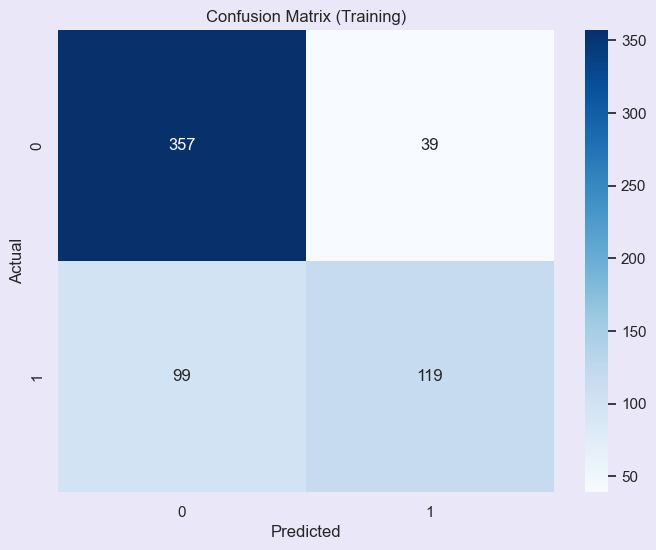

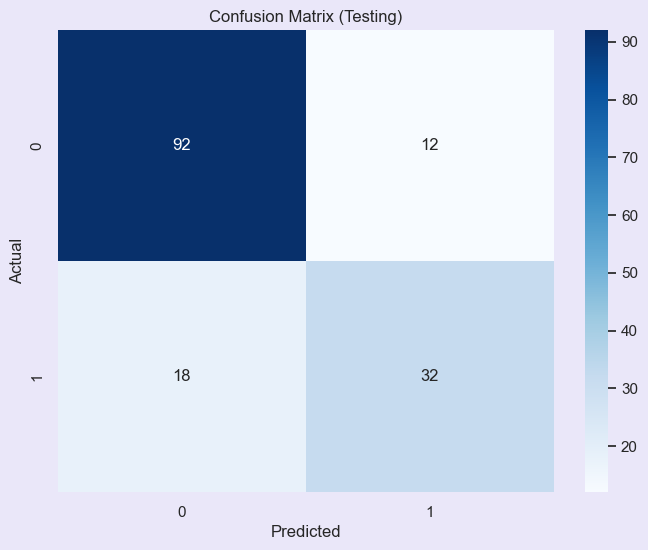

In [94]:
# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error # Import mean_squared_error

y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)

# Calculate MSE for training and testing data
mse_train_lr = mean_squared_error(y_train, y_pred_train)
mse_test_lr = mean_squared_error(y_test, y_pred_test)

print("Hasil Training:")
print(classification_report(y_train, y_pred_train))
print(f"Akurasi Training: {accuracy_score(y_train, y_pred_train)}")
print(f"MSE Training: {mse_train_lr}")

print("\nHasil Testing:")
print(classification_report(y_test, y_pred_test))
print(f"Akurasi Testing: {accuracy_score(y_test, y_pred_test)}")
print(f"MSE Testing: {mse_test_lr}")


import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix for training data
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Training)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot confusion matrix for testing data
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Testing)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Random Forest Classifier**

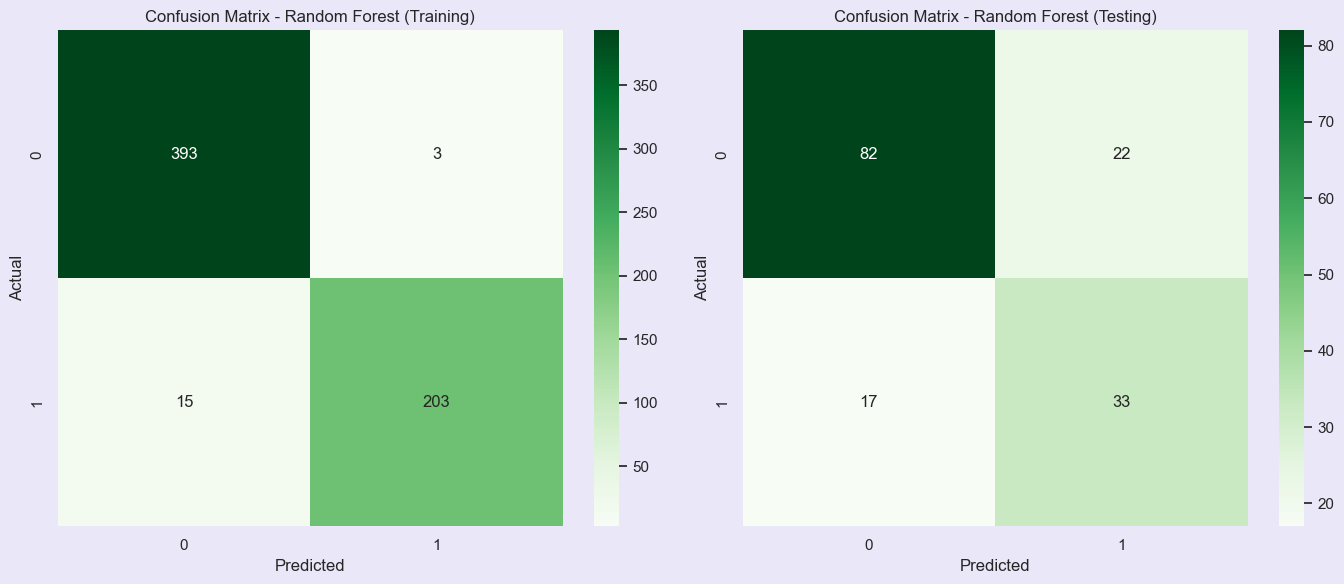


Hasil Training:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       396
           1       0.99      0.93      0.96       218

    accuracy                           0.97       614
   macro avg       0.97      0.96      0.97       614
weighted avg       0.97      0.97      0.97       614

Akurasi Training: 0.9706840390879479
MSE Training: 0.029315960912052116

Hasil Testing:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       104
           1       0.60      0.66      0.63        50

    accuracy                           0.75       154
   macro avg       0.71      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154

Akurasi Testing: 0.7467532467532467
MSE Testing: 0.2532467532467532


In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

rf_classifier = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_rf_classifier = grid_search.best_estimator_
y_pred_train_rf = best_rf_classifier.predict(X_train)
y_pred_test_rf = best_rf_classifier.predict(X_test)

# Menghitung MSE
mse_train_rf = mean_squared_error(y_train, y_pred_train_rf)
mse_test_rf = mean_squared_error(y_test, y_pred_test_rf)

conf_matrix_train_rf = confusion_matrix(y_train, y_pred_train_rf)
conf_matrix_test_rf = confusion_matrix(y_test, y_pred_test_rf)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Random Forest (Training)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Random Forest (Testing)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

print("\nHasil Training:")
print(classification_report(y_train, y_pred_train_rf))
print(f"Akurasi Training: {accuracy_score(y_train, y_pred_train_rf)}")
print(f"MSE Training: {mse_train_rf}")

print("\nHasil Testing:")
print(classification_report(y_test, y_pred_test_rf))
print(f"Akurasi Testing: {accuracy_score(y_test, y_pred_test_rf)}")
print(f"MSE Testing: {mse_test_rf}")

Hyperparameter Tuning untuk Random Forest Classifier

Akurasi Training: 0.8599348534201955
MSE Training: 0.14006514657980457

Akurasi Testing: 0.7337662337662337
MSE Testing: 0.2662337662337662


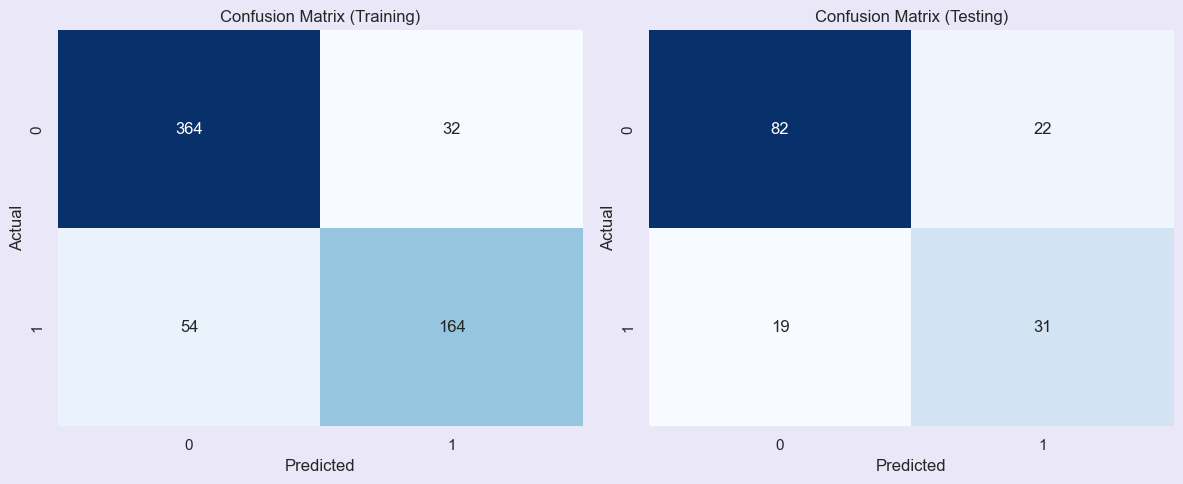

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

param_grid = {
    'n_estimators': [10, 20, 30],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8]
}

model = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

best_model.fit(X_train, y_train)

y_pred_train_rf = best_model.predict(X_train)
y_pred_test_rf = best_model.predict(X_test)

mse_train_rf_tuned = mean_squared_error(y_train, y_pred_train_rf)
mse_test_rf_tuned = mean_squared_error(y_test, y_pred_test_rf)

train_accuracy = best_model.score(X_train, y_train)
val_accuracy = best_model.score(X_test, y_test)

print("Akurasi Training:", train_accuracy)
print(f"MSE Training: {mse_train_rf_tuned}\n")

print("Akurasi Testing:", val_accuracy)
print(f"MSE Testing: {mse_test_rf_tuned}")

# --- Confusion Matrix Visualization ---
# Create confusion matrices
conf_matrix_train = confusion_matrix(y_train, y_pred_train_rf)
conf_matrix_test = confusion_matrix(y_test, y_pred_test_rf)

# Plot confusion matrices using Seaborn heatmap
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Training)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Testing)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

**Decision Tree**

Akurasi Training: 1.0
MSE Training: 0.0

Akurasi Testing: 0.7207792207792207
MSE Testing: 0.2792207792207792


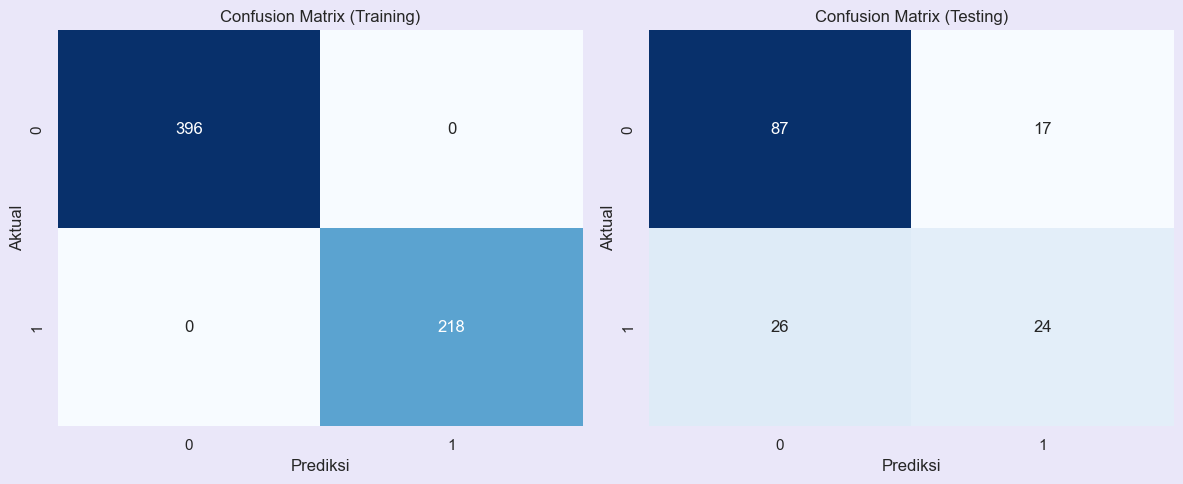

In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

decision_tree_model = DecisionTreeClassifier(random_state=42)

decision_tree_model.fit(X_train, y_train)

train_accuracy = decision_tree_model.score(X_train, y_train)
val_accuracy = decision_tree_model.score(X_test, y_test)

# Predict on training and test data
y_pred_train_dt = decision_tree_model.predict(X_train)
y_pred_test_dt = decision_tree_model.predict(X_test)

mse_train_dt = mean_squared_error(y_train, y_pred_train_dt)
mse_test_dt = mean_squared_error(y_test, y_pred_test_dt)

print("Akurasi Training:", train_accuracy)
print(f"MSE Training: {mse_train_dt}\n")

print("Akurasi Testing:", val_accuracy)
print(f"MSE Testing: {mse_test_dt}")

# --- Confusion Matrix Visualization ---
# Create confusion matrices
conf_matrix_train = confusion_matrix(y_train, y_pred_train_dt)
conf_matrix_test = confusion_matrix(y_test, y_pred_test_dt)

# Plot confusion matrices using Seaborn heatmap
plt.figure(figsize=(12, 5))  # Adjust figure size if needed

plt.subplot(1, 2, 1)  # Create subplot for training data
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Training)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

plt.subplot(1, 2, 2)  # Create subplot for testing data
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Testing)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

Hyperparameter Tuning untuk Decision Tree Classifier

Akurasi Training: 0.8175895765472313
MSE Training: 0.18241042345276873

Akurasi Testing: 0.7532467532467533
MSE Testing: 0.24675324675324675


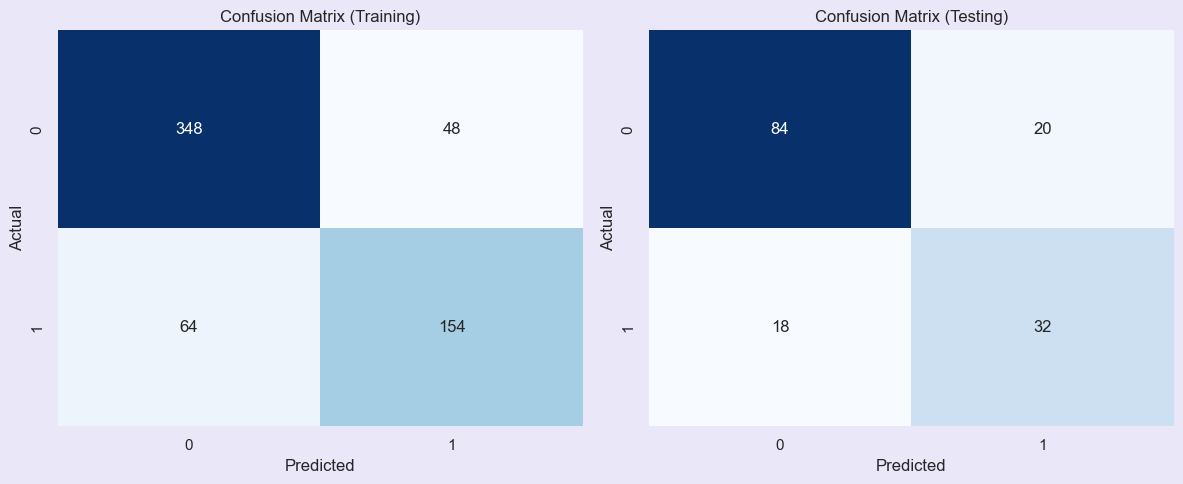

In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20, 25],
    'min_samples_leaf': [1, 3, 5, 7],
    'criterion': ['gini', 'entropy']
}

decision_tree_model = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(decision_tree_model, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

best_model.fit(X_train, y_train)

train_accuracy = best_model.score(X_train, y_train)
val_accuracy = best_model.score(X_test, y_test)

y_pred_train_dt = best_model.predict(X_train)
y_pred_test_dt = best_model.predict(X_test)

mse_train_dt_tuned = mean_squared_error(y_train, y_pred_train_dt)
mse_test_dt_tuned = mean_squared_error(y_test, y_pred_test_dt)

print("Akurasi Training:", train_accuracy)
print(f"MSE Training: {mse_train_dt_tuned}\n")

print("Akurasi Testing:", val_accuracy)
print(f"MSE Testing: {mse_test_dt_tuned}")

# --- Confusion Matrix Visualization ---
# Create confusion matrices
conf_matrix_train = confusion_matrix(y_train, y_pred_train_dt)
conf_matrix_test = confusion_matrix(y_test, y_pred_test_dt)

# Plot confusion matrices using Seaborn heatmap
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Training)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Testing)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

**Support Vector Classifier**

Akurasi Training: 0.7785016286644951
MSE Training: 0.22149837133550487

Akurasi Testing: 0.7922077922077922
MSE Testing: 0.2077922077922078


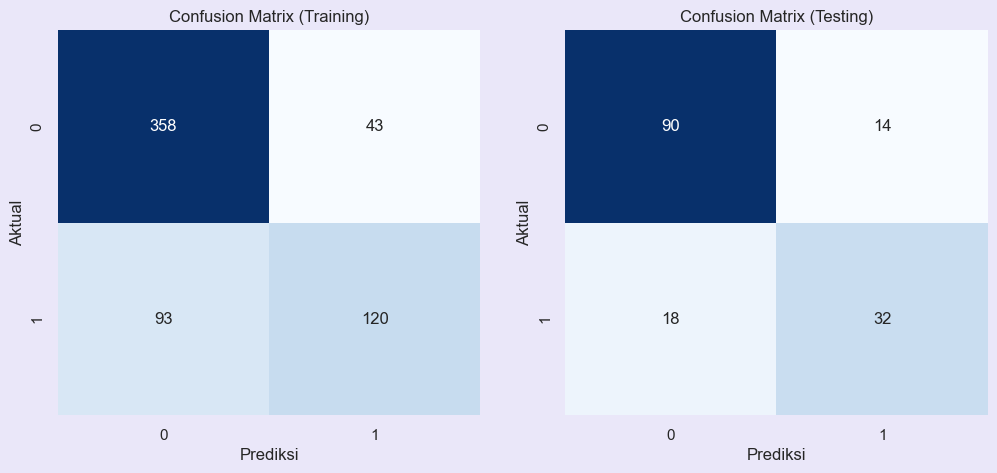

In [99]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear')

svm_model.fit(X_train, y_train)

y_train_pred = svm_model.predict(X_train)

y_test_pred = svm_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)

mse_train_svm = mean_squared_error(y_train, y_train_pred)
mse_test_svm = mean_squared_error(y_test, y_test_pred)

print("Akurasi Training:", train_accuracy)
print(f"MSE Training: {mse_train_svm}\n")

print("Akurasi Testing:", test_accuracy)
print(f"MSE Testing: {mse_test_svm}")

train_confusion = confusion_matrix(y_train, y_train_pred)
test_confusion = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix (Training)')

plt.subplot(1, 2, 2)
sns.heatmap(test_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix (Testing)')
plt.show()

# **Result**

In [100]:
# prompt: tampilkan semua hasilnya dalam bentuk tabel (akurasi testing dan mse testing saja) dalam bentuk tabel

import pandas as pd

data = {
    'Model': ['Logistic Regression', 'Random Forest', 'Random Forest (Tuned)', 'Decision Tree', 'Decision Tree (Tuned)', 'SVM'],
    'Testing Accuracy': [accuracy_score(y_test, y_pred_test), accuracy_score(y_test, y_pred_test_rf), val_accuracy, val_accuracy, val_accuracy, test_accuracy],
    'MSE Testing': [mse_test_lr, mse_test_rf, mse_test_rf_tuned, mse_test_dt, mse_test_dt_tuned, mse_test_svm]
}

df_results = pd.DataFrame(data)
df_results

,Model,Testing Accuracy,MSE Testing
0,Logistic Regression,0.805195,0.194805
1,Random Forest,0.733766,0.253247
2,Random Forest (Tuned),0.753247,0.266234
3,Decision Tree,0.753247,0.279221
4,Decision Tree (Tuned),0.753247,0.246753
5,SVM,0.792208,0.207792


In [104]:
import joblib

filename = 'log_reg_model.pkl'
joblib.dump(log_reg, filename)

['log_reg_model.pkl']